In [2]:
import openai
from openai.embeddings_utils import get_embedding, cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity as sk_cosine_similarity
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple

# Utility Functions

In [7]:
def get_all_embeddings(text_list: List[str], engine: str) -> List[float]:
    return [get_embedding(text, engine=engine) for text  in text_list]

In [8]:
def get_distance_matrix(queries: List[str], 
                        codeblocks_dict: Dict[str, str], 
                        codeblocks_embeddings: List[float],
                        queries_embeddings: List[float]) -> pd.DataFrame:    
    distances = []
    for i, q in enumerate(queries):
        query_embedding = queries_embeddings[i]
        distances.append([cosine_similarity(block_embedding, query_embedding) for block_embedding in codeblocks_embeddings])
    return pd.DataFrame(distances, queries, columns=codeblocks_dict.keys()), distances

In [9]:
def plot_similarity(features, labels, title='Semantic Similarity'):
    cos_sim = sk_cosine_similarity(features)
    fig = plt.figure(figsize=(15,15))
    sns.set(font_scale=1.2)
    cbar_kws=dict(use_gridspec=False, location="left")
    g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, annot=True, cmap="Blues", 
      cbar_kws=cbar_kws)
    g.tick_params(labelright=True, labelleft=False)
    g.set_yticklabels(labels, rotation=0)
    g.set_title(title)

In [10]:
def plot_distance_matrix(codeblocks_embeddings, query_embeddings, code_labels, query_labels, title='Distance Matrix'):
    cos_sim = sk_cosine_similarity(query_embeddings, codeblocks_embeddings)
    fig = plt.figure(figsize=(15,15))
    sns.set(font_scale=1.2)
    cbar_kws=dict(use_gridspec=False, location="left")
    g = sns.heatmap(
      cos_sim, xticklabels=code_labels, yticklabels=query_labels,
      vmin=0, vmax=1, annot=True, cmap="Blues", 
      cbar_kws=cbar_kws)
    g.tick_params(labelright=True, labelleft=False)
    g.set_yticklabels(query_labels, rotation=0)
    g.set_title(title)

In [11]:
def run_full_tests(queries, codeblocks_dict, text_engine, code_engine):
    codeblocks_embeddings = get_all_embeddings(codeblocks_dict.values(), code_engine)
    query_embeddings = get_all_embeddings(queries, text_engine)
    distance_matrix, distances = get_distance_matrix(queries, codeblocks_dict, codeblocks_embeddings, query_embeddings)
    np_distances = np.array(distances)
    print(f"Mean: {np.mean(np_distances)} Std: {np.std(np_distances)} Variance: {np.var(np_distances)}")
    display(distance_matrix)
    plot_distance_matrix(codeblocks_embeddings, query_embeddings, list(codeblocks_dict.keys()), queries, title='Query/Block Distance Matrix')
    plot_similarity([get_embedding(q, text_engine) for q in queries], queries, 'Queries Semantic Similarity')
    plot_similarity(codeblocks_embeddings, codeblocks_dict.keys(), 'Blocks Semantic Similarities')

# Test Python Functions

## Queries

In [12]:
queries = [
    "sort a list finding the minimum value and then swapping it with the first unsorted element",
    "sort a list comparing the current element with the next element of the array. if greater than next swap otherwise move next",
    "an inplace sort method",
    "a fast sort method",
    "a heap sort method",
    "a sort method using a heap",
    "a simple but not effective sort method",
    "order a list of number in a efficient way",
    "find a number on a list",
    "find a number on a list in a efficient way",
    "scan a list sequentially",
    "search on a ordered list",
    "check if a number is in the middle of a ordered list",
    "a recursive function",
    "a nested loop",
    "a loop within a loop",
    "a function that implement a nested loop",
    "a function that has a quadratic cost",
    "a function that implement a recursive pattern",
    "a function to find the factorial of a number"
]

## With Comments and Docstrings

In [13]:
functions_with_comments = {}

functions_with_comments['first insertion sort'] = """
def insertion_sort(array: list, start: int = 0, end: int = 0) -> list:
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> insertion_sort(array, 0, len(array))
    [1, 2, 4, 6, 7, 8, 8, 12, 14, 14, 22, 23, 27, 45, 56, 79]
    '''
    end = end or len(array)
    for i in range(start, end):
        temp_index = i
        temp_index_value = array[i]
        while temp_index != start and temp_index_value < array[temp_index - 1]:
            array[temp_index] = array[temp_index - 1]
            temp_index -= 1
        array[temp_index] = temp_index_value
    return array
"""


functions_with_comments['second insertion sort'] = """
def insertionSort(arr):
    # Move elements of arr[0..i-1], that are greater than key,
    # to one position ahead of their current position
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
            arr[j+1] = arr[j]
            j -= 1          
        arr[j+1] = key
"""


functions_with_comments['heap sort complete'] = """
def heapify(array: list, index: int, heap_size: int) -> None:  # Max Heap
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> heapify(array, len(array) // 2 ,len(array))
    '''
    largest = index
    left_index = 2 * index + 1  # Left Node
    right_index = 2 * index + 2  # Right Node

    if left_index < heap_size and array[largest] < array[left_index]:
        largest = left_index

    if right_index < heap_size and array[largest] < array[right_index]:
        largest = right_index

    if largest != index:
        array[index], array[largest] = array[largest], array[index]
        heapify(array, largest, heap_size)


def heap_sort(array: list) -> list:
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> heap_sort(array)
    [1, 2, 4, 6, 7, 8, 8, 12, 14, 14, 22, 23, 27, 45, 56, 79]
    '''
    n = len(array)

    for i in range(n // 2, -1, -1):
        heapify(array, i, n)

    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, 0, i)

    return array
"""


functions_with_comments['heap sort main method'] = """
def heap_sort(array: list) -> list:
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> heap_sort(array)
    [1, 2, 4, 6, 7, 8, 8, 12, 14, 14, 22, 23, 27, 45, 56, 79]
    '''
    n = len(array)

    for i in range(n // 2, -1, -1):
        heapify(array, i, n)

    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, 0, i)

    return array
"""


functions_with_comments['selection sort'] = """
def selection_sort(L):
    '''
    Sorts an array by finding the minimum value of the unsorted part and then swapping it with the first unsorted element.
    '''
    # i indicates how many items were sorted
    for i in range(len(L)-1):
        # To find the minimum value of the unsorted segment
        # We first assume that the first element is the lowest
        min_index = i
        # We then use j to loop through the remaining elements
        for j in range(i+1, len(L)-1):
            # Update the min_index if the element at j is lower than it
            if L[j] < L[min_index]:
                min_index = j
        # After finding the lowest item of the unsorted regions, swap with the first unsorted item
        L[i], L[min_index] = L[min_index], L[i]
"""


functions_with_comments['bubble sort'] = """
def bubbleSort(ar):
    '''
    Starting with the first element(index = 0), compare the current element with the next element of the array.
    If the current element is greater than the next element of the array, swap them.
    If the current element is less than the next element, move to the next element.
    '''
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in correct position
        for j in range(0, n-i-1):
            # Swap if the element found is greater than the next element
            if ar[j] > ar[j+1] :
                ar[j], ar[j+1] = ar[j+1], ar[j]
"""


functions_with_comments['quick sort with partition'] = """
def partition(arr, low, high):
    '''
    This function is used by the quick sort method.
    It takes last element as pivot, places
    the pivot element at its correct position in sorted
    array, and places all smaller (smaller than pivot)
    to left of pivot and all greater elements to right
    of pivot.
    '''
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low, high):
 
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
 
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

def quickSort(arr, low, high):
    '''
    The main function that implements QuickSort
    arr[] --> Array to be sorted,
    low  --> Starting index,
    high  --> Ending index
    '''
    if len(arr) == 1:
        return arr
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
"""


functions_with_comments['quick sort main'] = """
def quickSort(arr, low, high):
    '''
    The main function that implements QuickSort
    arr[] --> Array to be sorted,
    low  --> Starting index,
    high  --> Ending index
    '''
    if len(arr) == 1:
        return arr
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
"""


functions_with_comments['linear search'] = """
def linearsearch(arr, x):
    '''
    Start from the leftmost element of given arr[] and one by one compare element x with each element of arr[]
    If x matches with any of the element, return the index value.
    If x doesn’t match with any of elements in arr[] , return -1 or element not found.
    '''
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1
"""


functions_with_comments['binary search'] = """
def binarySearch(arr, start, end, x):
    '''
    Given a sorted list find an element with the help of a binary search.
    
    Compare x with the middle element.
    If x matches with the middle element, we return the mid index.
    Else If x is greater than the mid element, then x can only lie in right half subarray after the mid element. So we recur for the right half.
    Else (x is smaller) recur for the left half.
    '''
    # check condition
    if end >= start:
        mid = start + (end- start)//2
        # If element is present at the middle
        if arr[mid] == x:
            return mid
        # If element is smaller than mid
        elif arr[mid] > x:
            return binarySearchAppr(arr, start, mid-1, x)
        # Else the element greator than mid
        else:
            return binarySearchAppr(arr, mid+1, end, x)
    else:
        # Element is not found in the array
        return -1
"""

functions_with_comments['fibonacci recursive'] = """
def fibonacci(n):
    '''
    The Fibonacci numbers are the numbers in the following integer sequence.
    0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ……..
    
    Recursive approach.
    '''
    if n<0:
        print("Fibbonacci can't be computed")
    # First Fibonacci number
    elif n==1:
        return 0
    # Second Fibonacci number
    elif n==2:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)
"""


functions_with_comments['fibonacci non recursive'] = """
def fibonacci(n):
    '''
    The Fibonacci numbers are the numbers in the following integer sequence.
    0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ……..
    
    Space Optimized, non recursive approach.
    '''
    a = 0
    b = 1

    # Check is n is less than 0
    if n < 0:
        print("Incorrect input")
    # Check is n is equal to 0
    elif n == 0:
        return 0
    # Check if n is equal to 1
    elif n == 1:
        return b
    else:
        for i in range(1, n):
            c = a + b
            a = b
            b = c
        return b
"""


functions_with_comments['factorial recursive'] = """
def factorial(x):
    '''
    This is a recursive function
    to find the factorial of an integer
    '''

    if x == 1:
        return 1
    else:
        return (x * factorial(x-1))
"""

Mean: 0.6339145334650419 Std: 0.03911728257021856 Variance: 0.0015301617956783252


,first insertion sort,second insertion sort,heap sort complete,heap sort main method,selection sort,bubble sort,quick sort with partition,quick sort main,linear search,binary search,fibonacci recursive,fibonacci non recursive,factorial recursive
sort a list finding the minimum value and then swapping it with the first unsorted element,0.697496,0.736918,0.659310,0.663058,0.782412,0.687520,0.695908,0.682190,0.659301,0.680540,0.585026,0.585818,0.584761
sort a list comparing the current element with the next element of the array. if greater than next swap otherwise move next,0.704370,0.752297,0.652216,0.665150,0.744241,0.735983,0.692069,0.672205,0.667218,0.666098,0.577611,0.577585,0.568373
an inplace sort method,0.662270,0.703695,0.603585,0.626155,0.691832,0.621115,0.639345,0.647482,0.607517,0.605956,0.576728,0.581142,0.567201
a fast sort method,0.674349,0.690387,0.622504,0.651970,0.690171,0.624307,0.657534,0.668090,0.615111,0.629108,0.608153,0.606129,0.586988
a heap sort method,0.675104,0.701978,0.675450,0.697834,0.690950,0.627790,0.648627,0.663154,0.612910,0.620109,0.598118,0.594070,0.575841
a sort method using a heap,0.683347,0.708021,0.688445,0.701983,0.704621,0.653896,0.666874,0.677886,0.621779,0.631817,0.593304,0.593767,0.577865
a simple but not effective sort method,0.671117,0.683741,0.618245,0.650024,0.688788,0.634601,0.649575,0.667384,0.628114,0.639533,0.614858,0.619266,0.588260
order a list of number in a efficient way,0.678992,0.669318,0.653537,0.671941,0.659847,0.617770,0.629978,0.635887,0.626405,0.623726,0.676441,0.681353,0.639951
find a number on a list,0.644605,0.645276,0.617285,0.625024,0.640850,0.604305,0.609554,0.605898,0.648974,0.656170,0.656106,0.649972,0.645506
find a number on a list in a efficient way,0.673795,0.676192,0.645502,0.651092,0.668084,0.626262,0.639529,0.637000,0.666587,0.678915,0.672517,0.673609,0.658285


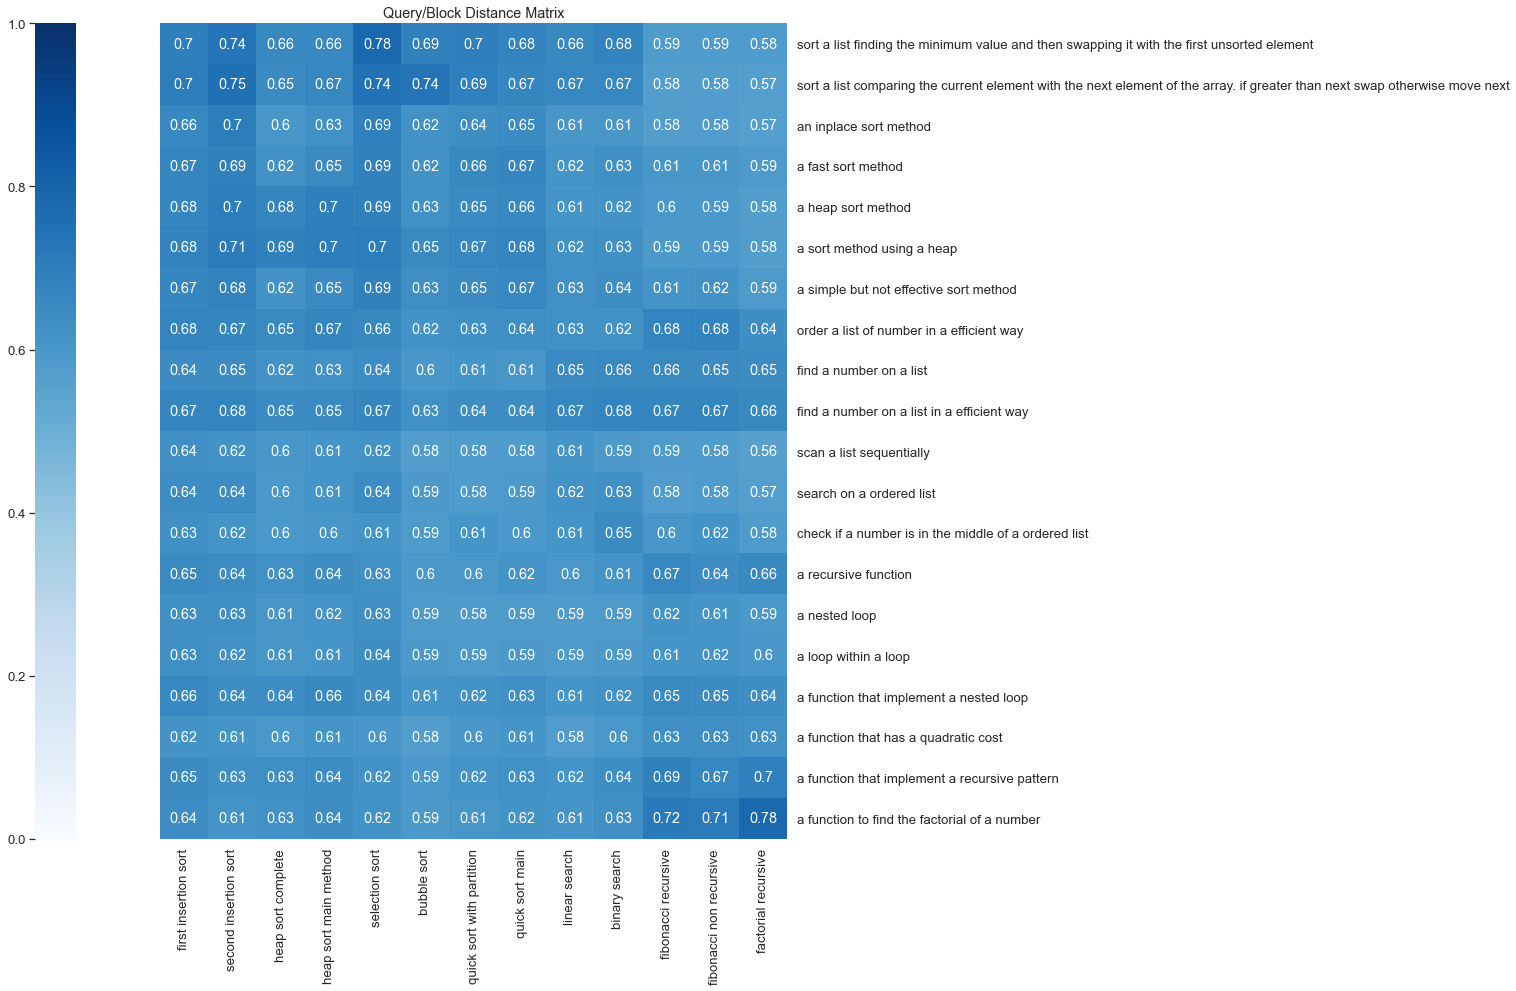

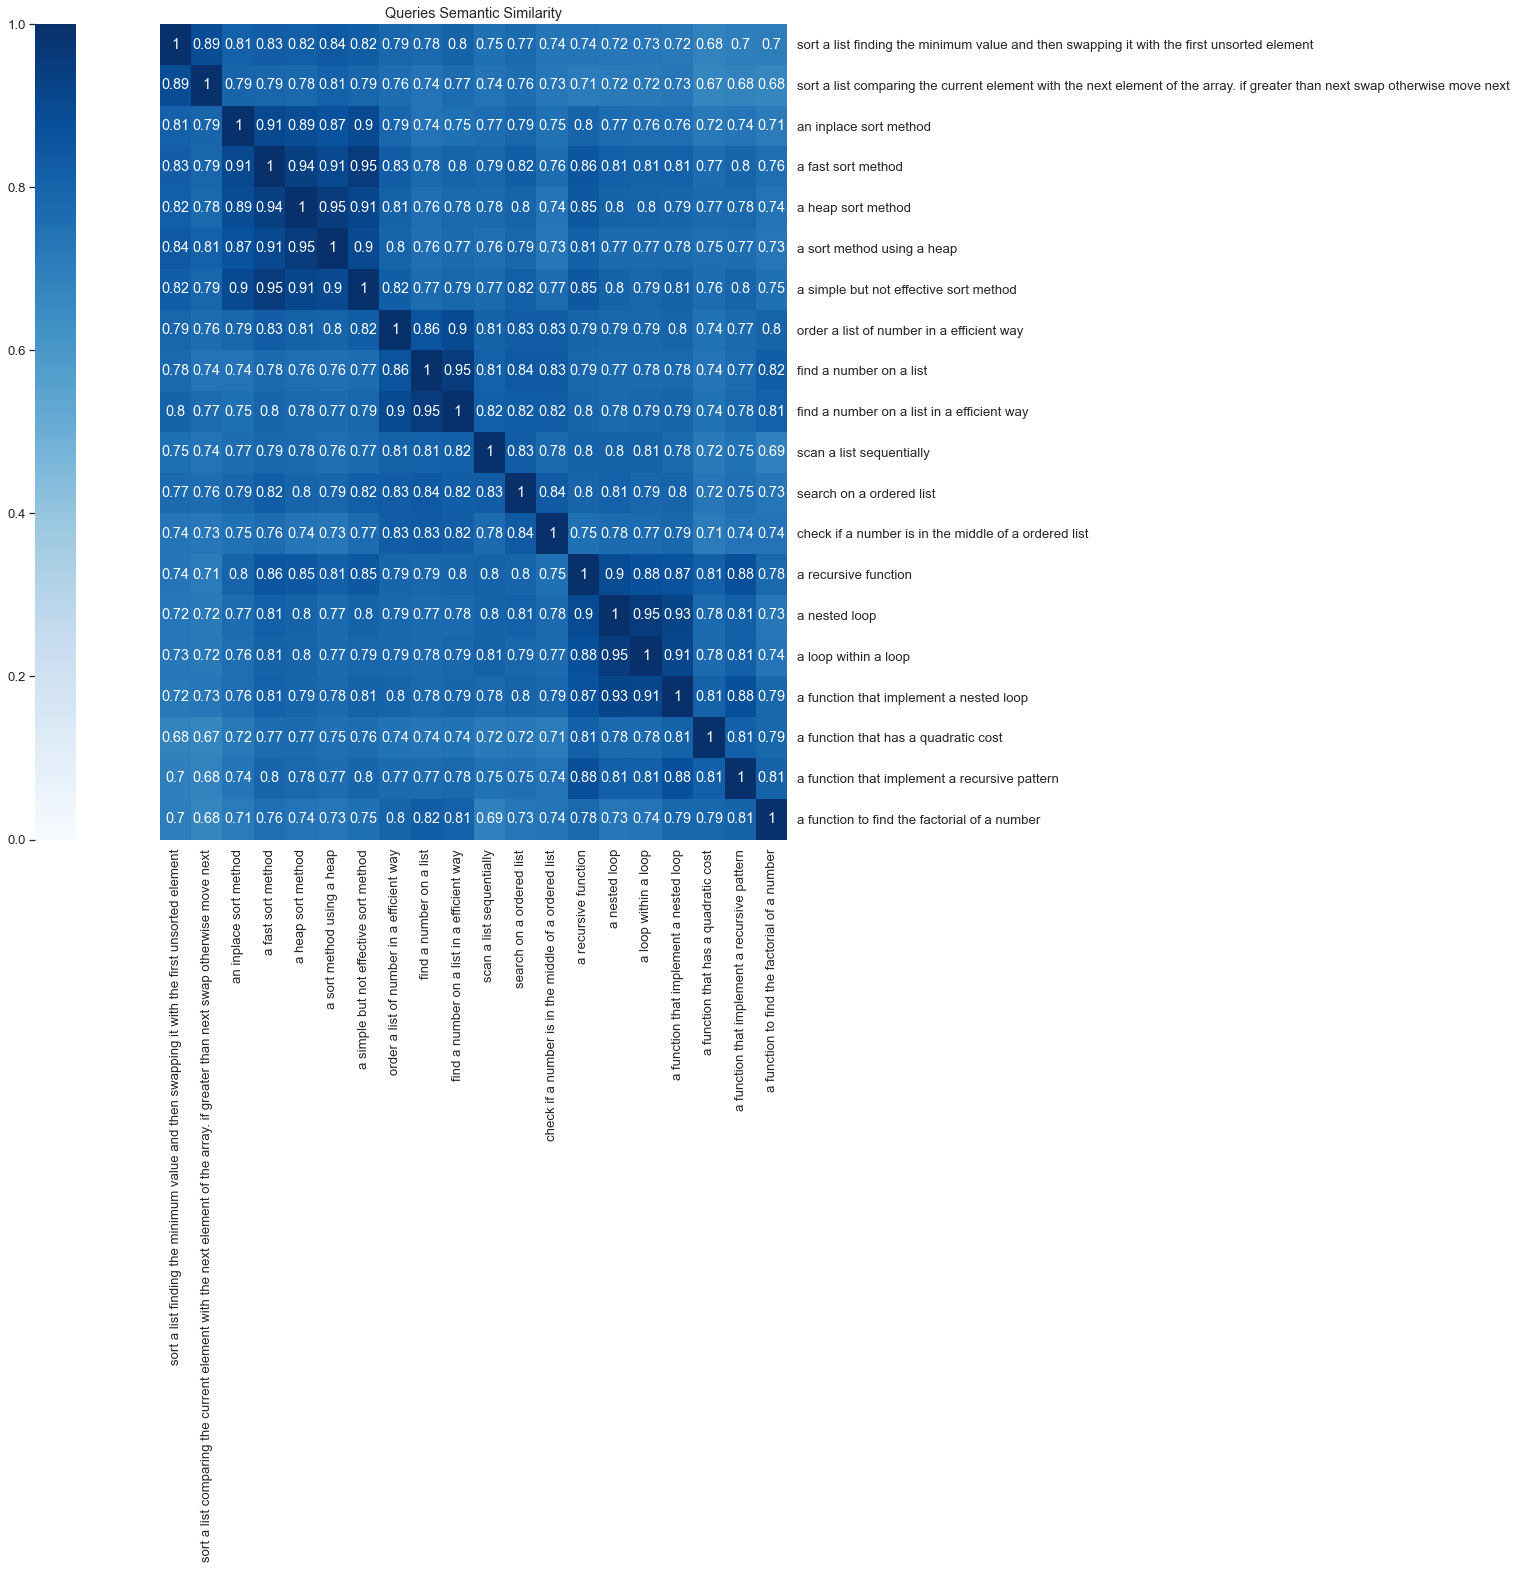

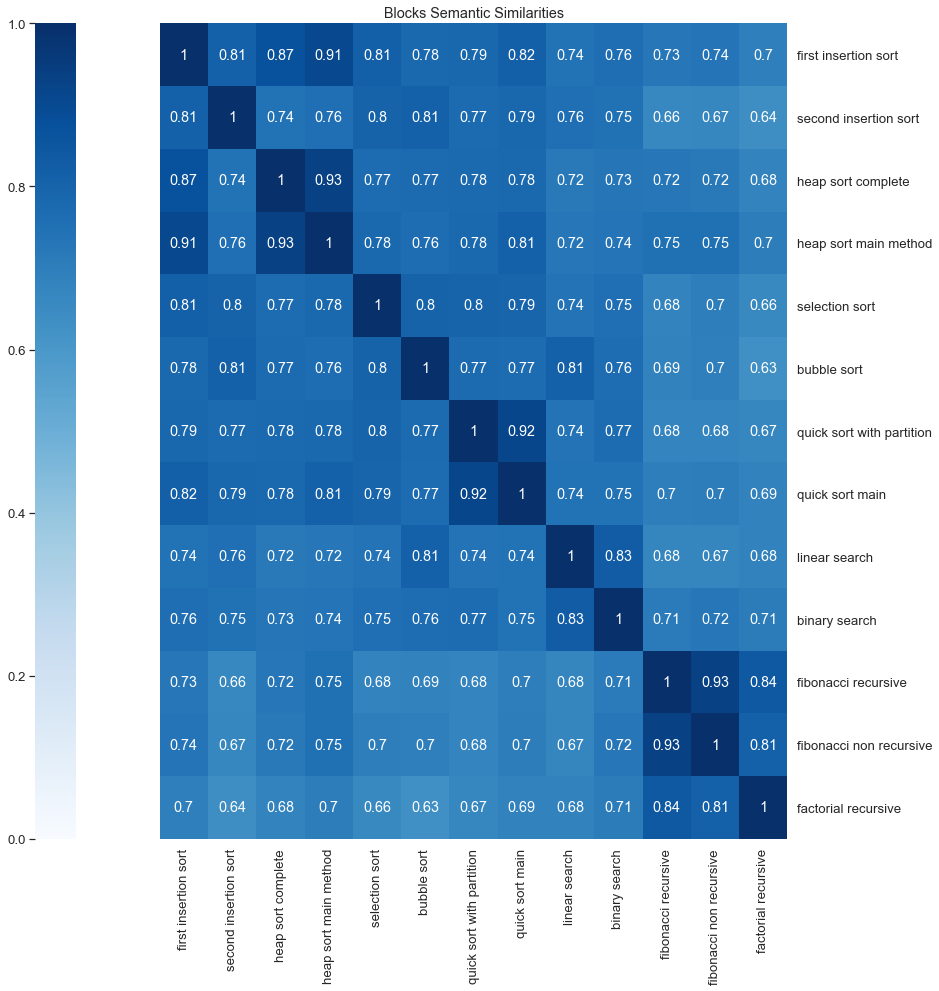

In [14]:
run_full_tests(queries, functions_with_comments, 'code-search-babbage-text-001-msft', 'code-search-babbage-code-001-msft')

## Without Comments and Docstrings

In [15]:
functions_without_comments = {}

functions_without_comments['first insertion sort'] = """
def insertion_sort(array: list, start: int = 0, end: int = 0) -> list:
    end = end or len(array)
    for i in range(start, end):
        temp_index = i
        temp_index_value = array[i]
        while temp_index != start and temp_index_value < array[temp_index - 1]:
            array[temp_index] = array[temp_index - 1]
            temp_index -= 1
        array[temp_index] = temp_index_value
    return array
"""


functions_without_comments['second insertion sort'] = """
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
            arr[j+1] = arr[j]
            j -= 1          
        arr[j+1] = key
"""


functions_without_comments['heap sort complete'] = """
def heapify(array: list, index: int, heap_size: int) -> None:
    largest = index
    left_index = 2 * index + 1
    right_index = 2 * index + 2

    if left_index < heap_size and array[largest] < array[left_index]:
        largest = left_index

    if right_index < heap_size and array[largest] < array[right_index]:
        largest = right_index

    if largest != index:
        array[index], array[largest] = array[largest], array[index]
        heapify(array, largest, heap_size)


def heap_sort(array: list) -> list:
    n = len(array)

    for i in range(n // 2, -1, -1):
        heapify(array, i, n)

    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, 0, i)

    return array
"""


functions_without_comments['heap sort main method'] = """
def heap_sort(array: list) -> list:
    n = len(array)

    for i in range(n // 2, -1, -1):
        heapify(array, i, n)

    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, 0, i)

    return array
"""


functions_without_comments['selection sort'] = """
def selection_sort(L):
    for i in range(len(L)-1):
        min_index = i
        for j in range(i+1, len(L)-1):
            if L[j] < L[min_index]:
                min_index = j
        L[i], L[min_index] = L[min_index], L[i]
"""


functions_without_comments['bubble sort'] = """
def bubbleSort(ar):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if ar[j] > ar[j+1] :
                ar[j], ar[j+1] = ar[j+1], ar[j]
"""


functions_without_comments['quick sort with partition'] = """
def partition(arr, low, high):
    i = (low-1)
    pivot = arr[high]
 
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
"""


functions_without_comments['quick sort main'] = """
def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)
"""


functions_without_comments['linear search'] = """
def linearsearch(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1
"""


functions_without_comments['binary search'] = """
def binarySearch(arr, start, end, x):
    if end >= start:
        mid = start + (end- start)//2
        if arr[mid] == x:
            return mid
        elif arr[mid] > x:
            return binarySearchAppr(arr, start, mid-1, x)
        else:
            return binarySearchAppr(arr, mid+1, end, x)
    else:
        return -1
"""

functions_without_comments['fibonacci recursive'] = """
def fibonacci(n):
    if n<0:
        print("Fibbonacci can't be computed")
    elif n==1:
        return 0
    elif n==2:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)
"""


functions_without_comments['fibonacci non recursive'] = """
def fibonacci(n):
    a = 0
    b = 1

    if n < 0:
        print("Incorrect input")
    elif n == 0:
        return 0
    elif n == 1:
        return b
    else:
        for i in range(1, n):
            c = a + b
            a = b
            b = c
        return b
"""


functions_without_comments['factorial recursive'] = """
def factorial(x):
    if x == 1:
        return 1
    else:
        return (x * factorial(x-1))
"""

Mean: 0.6640818029438563 Std: 0.041311304938144694 Variance: 0.001706623915692378


,first insertion sort,second insertion sort,heap sort complete,heap sort main method,selection sort,bubble sort,quick sort with partition,quick sort main,linear search,binary search,fibonacci recursive,fibonacci non recursive,factorial recursive
sort a list finding the minimum value and then swapping it with the first unsorted element,0.755028,0.740276,0.698126,0.723057,0.784357,0.749316,0.718648,0.735556,0.696056,0.696526,0.602880,0.611467,0.620607
sort a list comparing the current element with the next element of the array. if greater than next swap otherwise move next,0.755686,0.735073,0.689091,0.714216,0.756297,0.746640,0.703612,0.715230,0.685045,0.676285,0.597489,0.604756,0.597071
an inplace sort method,0.708440,0.723654,0.645551,0.676897,0.717878,0.722820,0.673166,0.706745,0.668237,0.663023,0.597119,0.613577,0.600301
a fast sort method,0.721184,0.717650,0.657791,0.690986,0.719598,0.717660,0.701940,0.730426,0.679272,0.684660,0.628456,0.637725,0.624569
a heap sort method,0.724428,0.731822,0.717949,0.740110,0.727648,0.730317,0.702291,0.730051,0.677464,0.684454,0.629752,0.638832,0.621118
a sort method using a heap,0.728165,0.731320,0.725892,0.740122,0.730033,0.732832,0.707894,0.727557,0.673855,0.678913,0.617721,0.639425,0.619365
a simple but not effective sort method,0.714103,0.705337,0.650789,0.681582,0.713803,0.710676,0.689189,0.712176,0.675786,0.678721,0.631718,0.649247,0.626360
order a list of number in a efficient way,0.718634,0.691327,0.662446,0.692603,0.704059,0.690747,0.672325,0.683991,0.674585,0.668129,0.679826,0.675941,0.670611
find a number on a list,0.689022,0.653148,0.627000,0.641268,0.675078,0.650452,0.652601,0.656654,0.697285,0.684044,0.657810,0.660942,0.644256
find a number on a list in a efficient way,0.725918,0.686369,0.661168,0.680041,0.705994,0.679424,0.683621,0.689734,0.728478,0.710181,0.677022,0.674159,0.667107


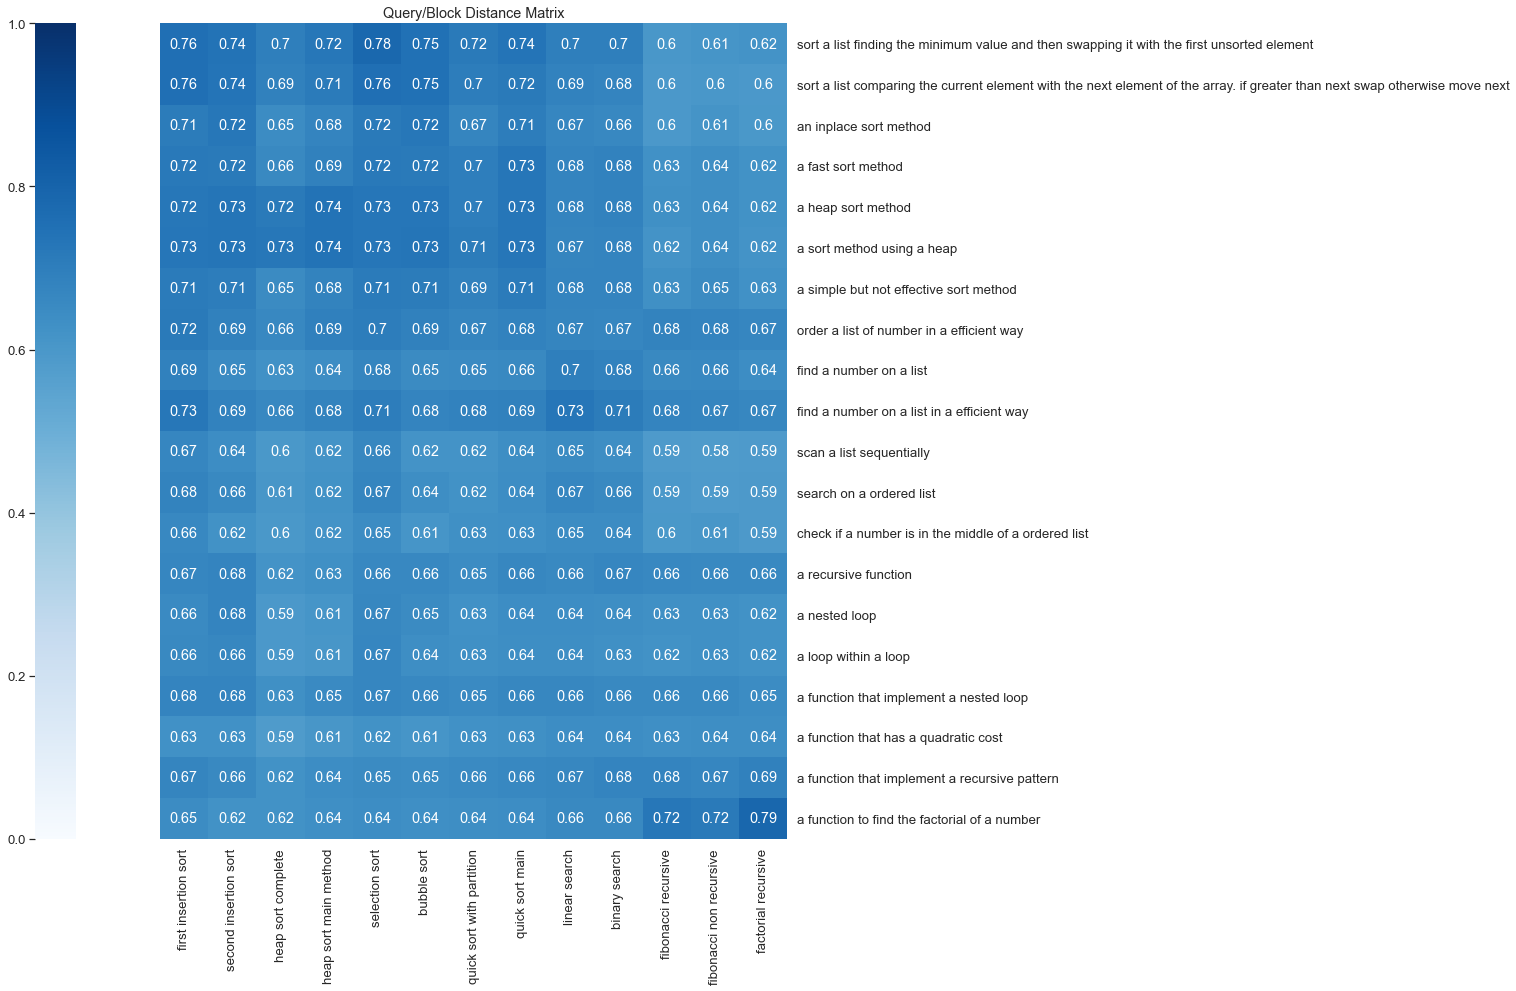

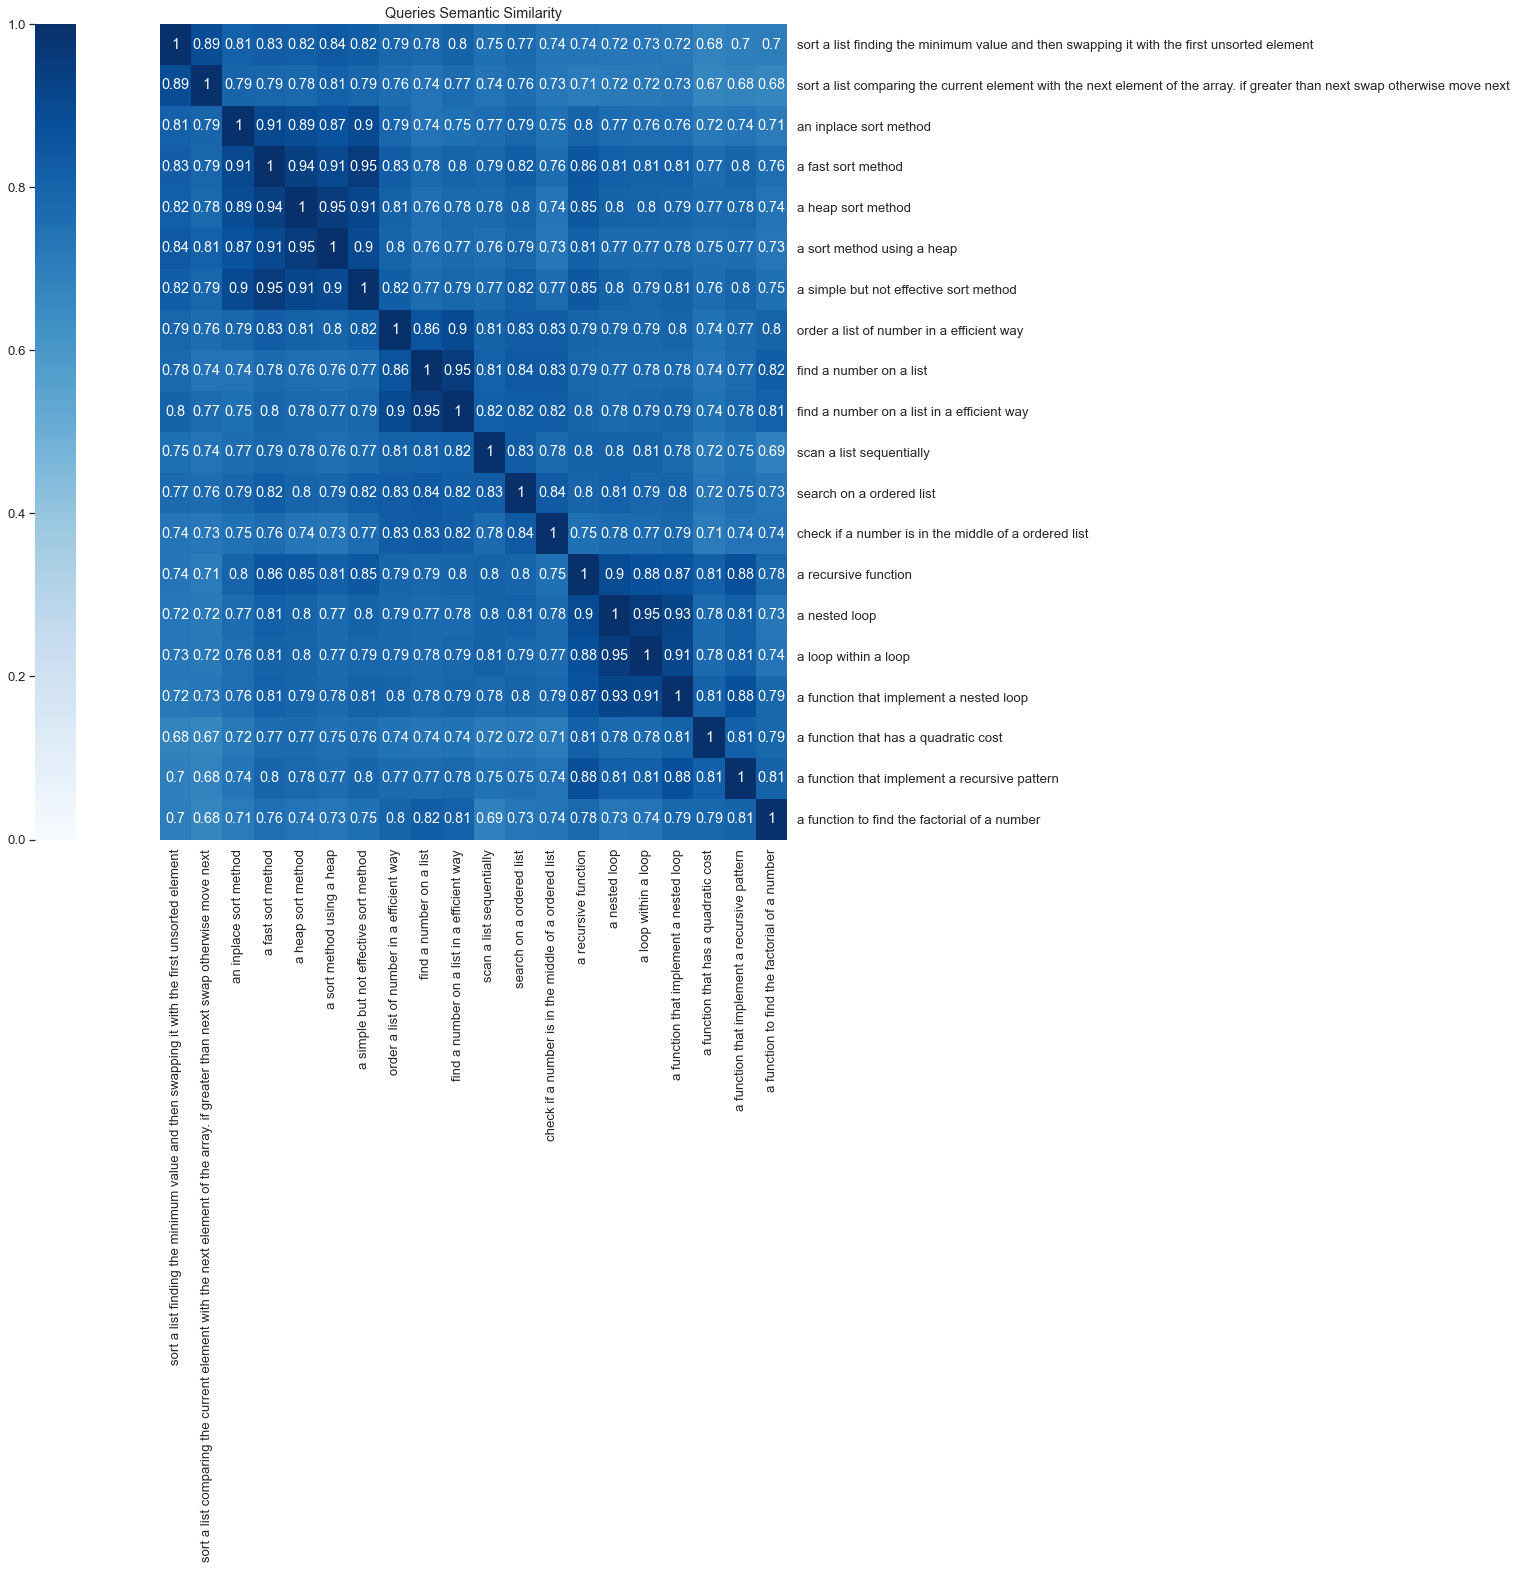

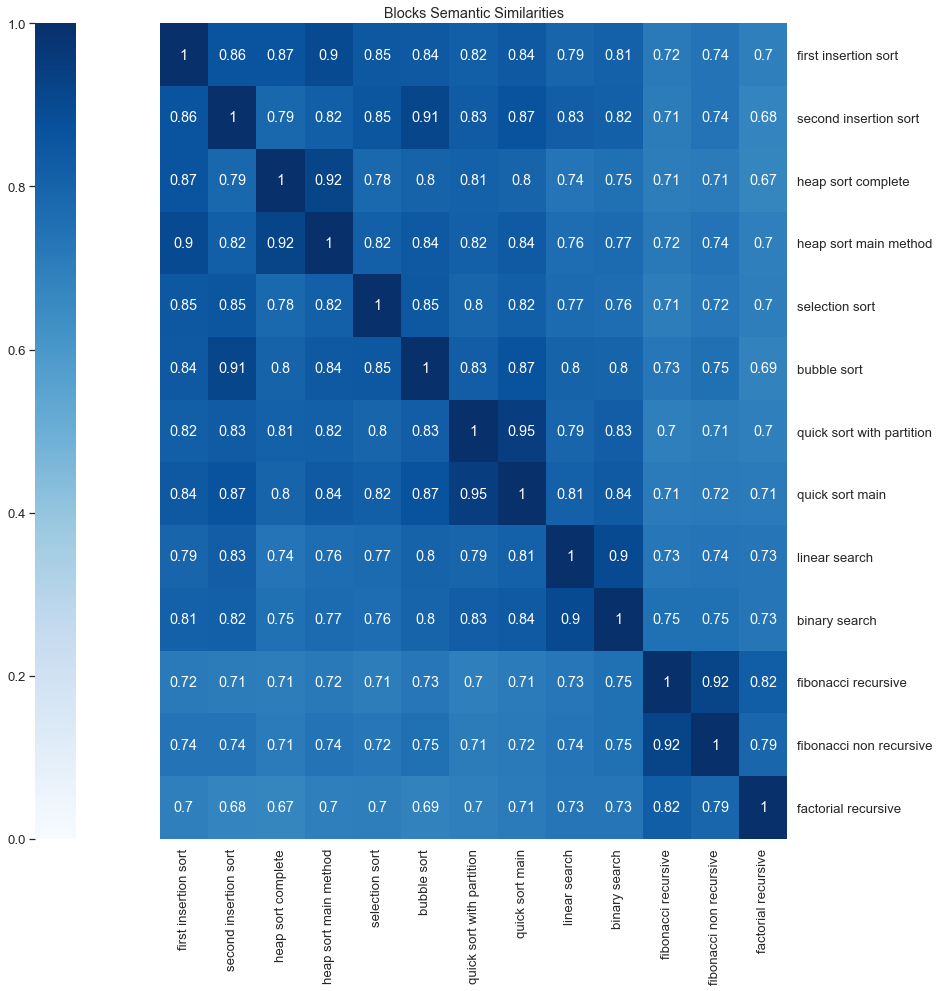

In [16]:
run_full_tests(queries, functions_without_comments, 'code-search-babbage-text-001-msft', 'code-search-babbage-code-001-msft')

## Obfuscating function and variable names

In [17]:
functions_obfuscated = {}

functions_obfuscated['first insertion sort'] = """
def f1(a: list, s: int = 0, e: int = 0) -> list:
    e = e or len(a)
    for i in range(s, e):
        temp_index = i
        temp_index_value = a[i]
        while temp_index != s and temp_index_value < a[temp_index - 1]:
            a[temp_index] = a[temp_index - 1]
            temp_index -= 1
        a[temp_index] = temp_index_value
    return a
"""


functions_obfuscated['second insertion sort'] = """
def f2(arr):
    for i in range(1, len(arr)):
        k = arr[i]
        j = i-1
        while j >=0 and k < arr[j] :
            arr[j+1] = arr[j]
            j -= 1          
        arr[j+1] = k
"""


functions_obfuscated['heap sort complete'] = """
def f4(a: list, i: int, s: int) -> None:
    l = i
    li = 2 * i + 1
    ri = 2 * i + 2

    if li < s and a[l] < a[li]:
        l = li

    if ri < s and a[l] < a[ri]:
        l = ri

    if l != i:
        a[i], a[l] = a[l], a[i]
        f4(a, l, s)


def f3(a: list) -> list:
    n = len(a)

    for i in range(n // 2, -1, -1):
        f4(a, i, n)

    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        f4(a, 0, i)

    return a
"""


functions_obfuscated['heap sort main method'] = """
def f3(a: list) -> list:
    n = len(a)

    for i in range(n // 2, -1, -1):
        f4(a, i, n)

    for i in range(n - 1, 0, -1):
        a[i], a[0] = a[0], a[i]
        f4(a, 0, i)

    return a
"""


functions_obfuscated['selection sort'] = """
def f5(L):
    for i in range(len(L)-1):
        min_index = i
        for j in range(i+1, len(L)-1):
            if L[j] < L[min_index]:
                min_index = j
        L[i], L[min_index] = L[min_index], L[i]
"""


functions_obfuscated['bubble sort'] = """
def f6(ar):
    n = len(ar)
    for i in range(n):
        for j in range(0, n-i-1):
            if ar[j] > ar[j+1] :
                ar[j], ar[j+1] = ar[j+1], ar[j]
"""


functions_obfuscated['quick sort with partition'] = """
def f7(a, l, h):
    i = (l-1)
    pivot = a[h]
 
    for j in range(l, h):
        if a[j] <= pivot:
            i = i+1
            a[i], a[j] = a[j], a[i]
 
    a[i+1], a[h] = a[h], a[i+1]
    return (i+1)

def f8(a, l, h):
    if len(a) == 1:
        return a
    if l < h:
        pi = f7(a, l, h)
        f8(a, l, pi-1)
        f8(a, pi+1, h)
"""


functions_obfuscated['quick sort main'] = """
def f8(a, l, h):
    if len(a) == 1:
        return a
    if l < h:
        pi = f7(a, l, h)
        f8(a, l, pi-1)
        f8(a, pi+1, h)
"""


functions_obfuscated['linear search'] = """
def f9(a, x):
    for i in range(len(a)):
        if a[i] == x:
            return i
    return -1
"""


functions_obfuscated['binary search'] = """
def f10(a, s, e, x):
    if e >= s:
        m = s + (e- s)//2
        if a[m] == x:
            return m
        elif a[m] > x:
            return binarySearchAppr(a, s, m-1, x)
        else:
            return binarySearchAppr(a, m+1, e, x)
    else:
        return -1
"""

functions_obfuscated['fibonacci recursive'] = """
def f12(n):
    if n<0:
        print("can't be computed")
    elif n==1:
        return 0
    elif n==2:
        return 1
    else:
        return f12(n-1)+f12(n-2)
"""


functions_obfuscated['fibonacci non recursive'] = """
def f13(n):
    a = 0
    b = 1

    if n < 0:
        print("Incorrect input")
    elif n == 0:
        return 0
    elif n == 1:
        return b
    else:
        for i in range(1, n):
            c = a + b
            a = b
            b = c
        return b
"""


functions_obfuscated['factorial recursive'] = """
def f14(x):
    if x == 1:
        return 1
    else:
        return (x * f14(x-1))
"""


Mean: 0.6620261151164617 Std: 0.026255677329953396 Variance: 0.0006893605920546286


,first insertion sort,second insertion sort,heap sort complete,heap sort main method,selection sort,bubble sort,quick sort with partition,quick sort main,linear search,binary search,fibonacci recursive,fibonacci non recursive,factorial recursive
sort a list finding the minimum value and then swapping it with the first unsorted element,0.699727,0.692772,0.668647,0.676150,0.726722,0.698671,0.669458,0.656662,0.681938,0.692977,0.628825,0.619714,0.625553
sort a list comparing the current element with the next element of the array. if greater than next swap otherwise move next,0.693912,0.690361,0.665259,0.675068,0.694244,0.706265,0.666695,0.650530,0.671197,0.668426,0.631039,0.616919,0.620200
an inplace sort method,0.661316,0.678254,0.650241,0.658753,0.668053,0.694732,0.644110,0.641451,0.663689,0.665613,0.626899,0.616921,0.611947
a fast sort method,0.677031,0.675968,0.660839,0.674408,0.668282,0.671931,0.662336,0.660963,0.684290,0.683281,0.635887,0.627543,0.628818
a heap sort method,0.681746,0.683445,0.671424,0.677029,0.675309,0.680121,0.675885,0.670754,0.676517,0.680496,0.641947,0.627562,0.625882
a sort method using a heap,0.688575,0.677392,0.668465,0.677059,0.676303,0.679359,0.682396,0.670575,0.677356,0.689215,0.636220,0.636409,0.621454
a simple but not effective sort method,0.677439,0.662843,0.653991,0.664201,0.657954,0.664705,0.650623,0.647018,0.671817,0.678411,0.638263,0.637595,0.627271
order a list of number in a efficient way,0.706955,0.684614,0.688214,0.702345,0.687916,0.690012,0.669094,0.672371,0.674423,0.666617,0.683012,0.675720,0.666119
find a number on a list,0.688742,0.665684,0.676429,0.689529,0.691750,0.675736,0.679615,0.679090,0.701609,0.688770,0.675421,0.671484,0.661540
find a number on a list in a efficient way,0.714203,0.690851,0.701616,0.716281,0.712476,0.696785,0.697304,0.693300,0.720756,0.702193,0.697945,0.681575,0.678874


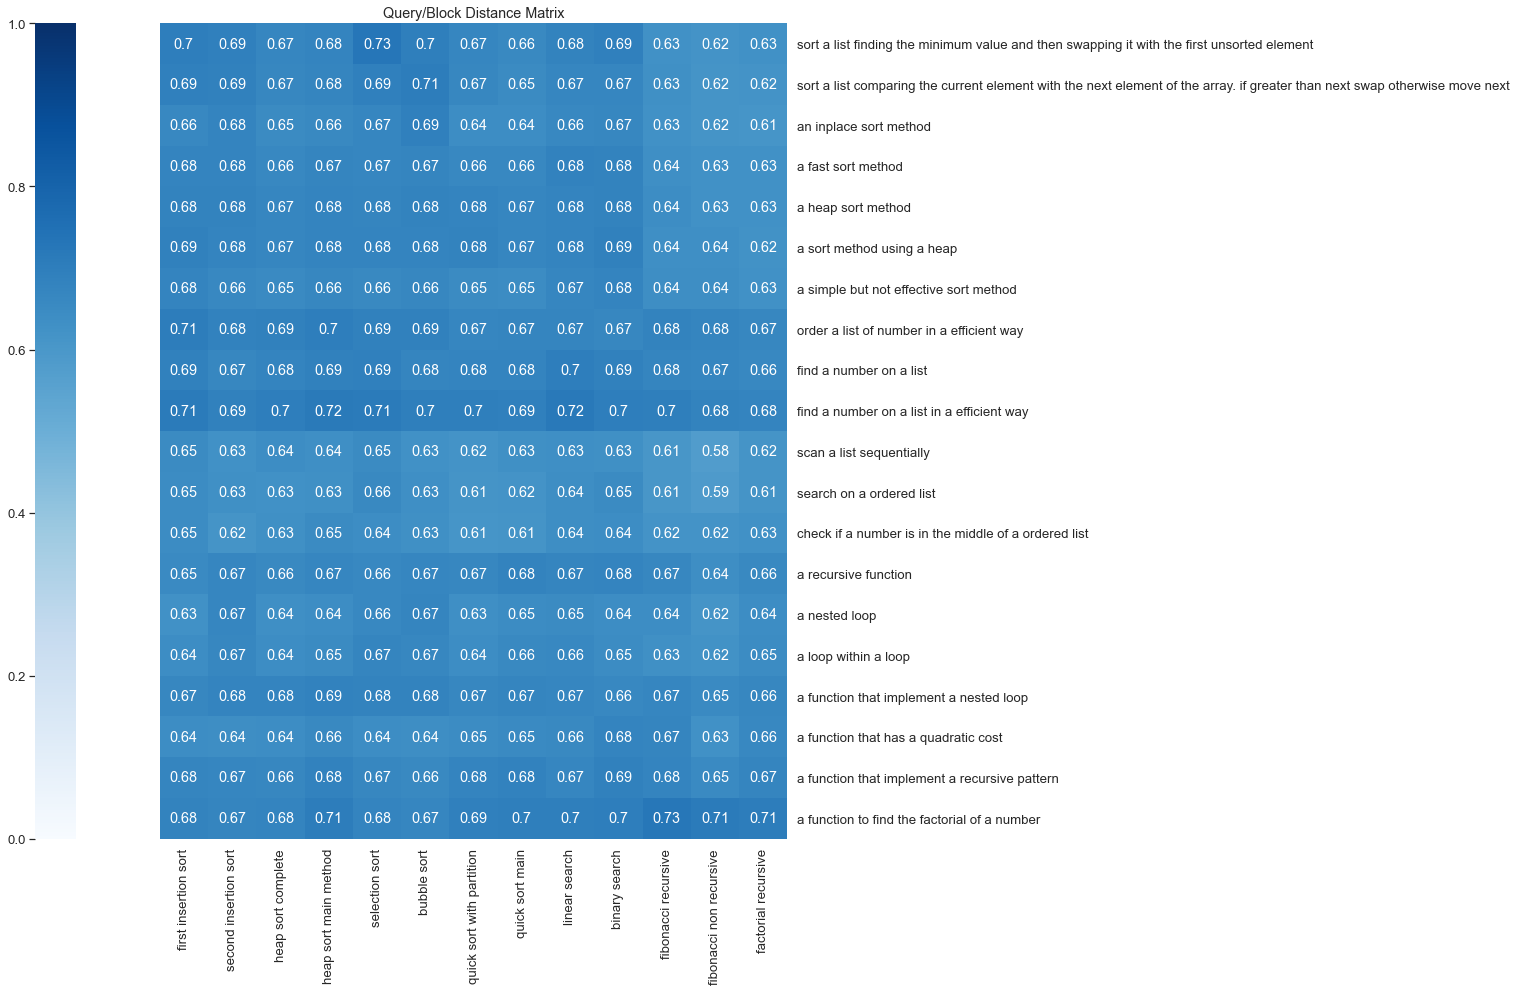

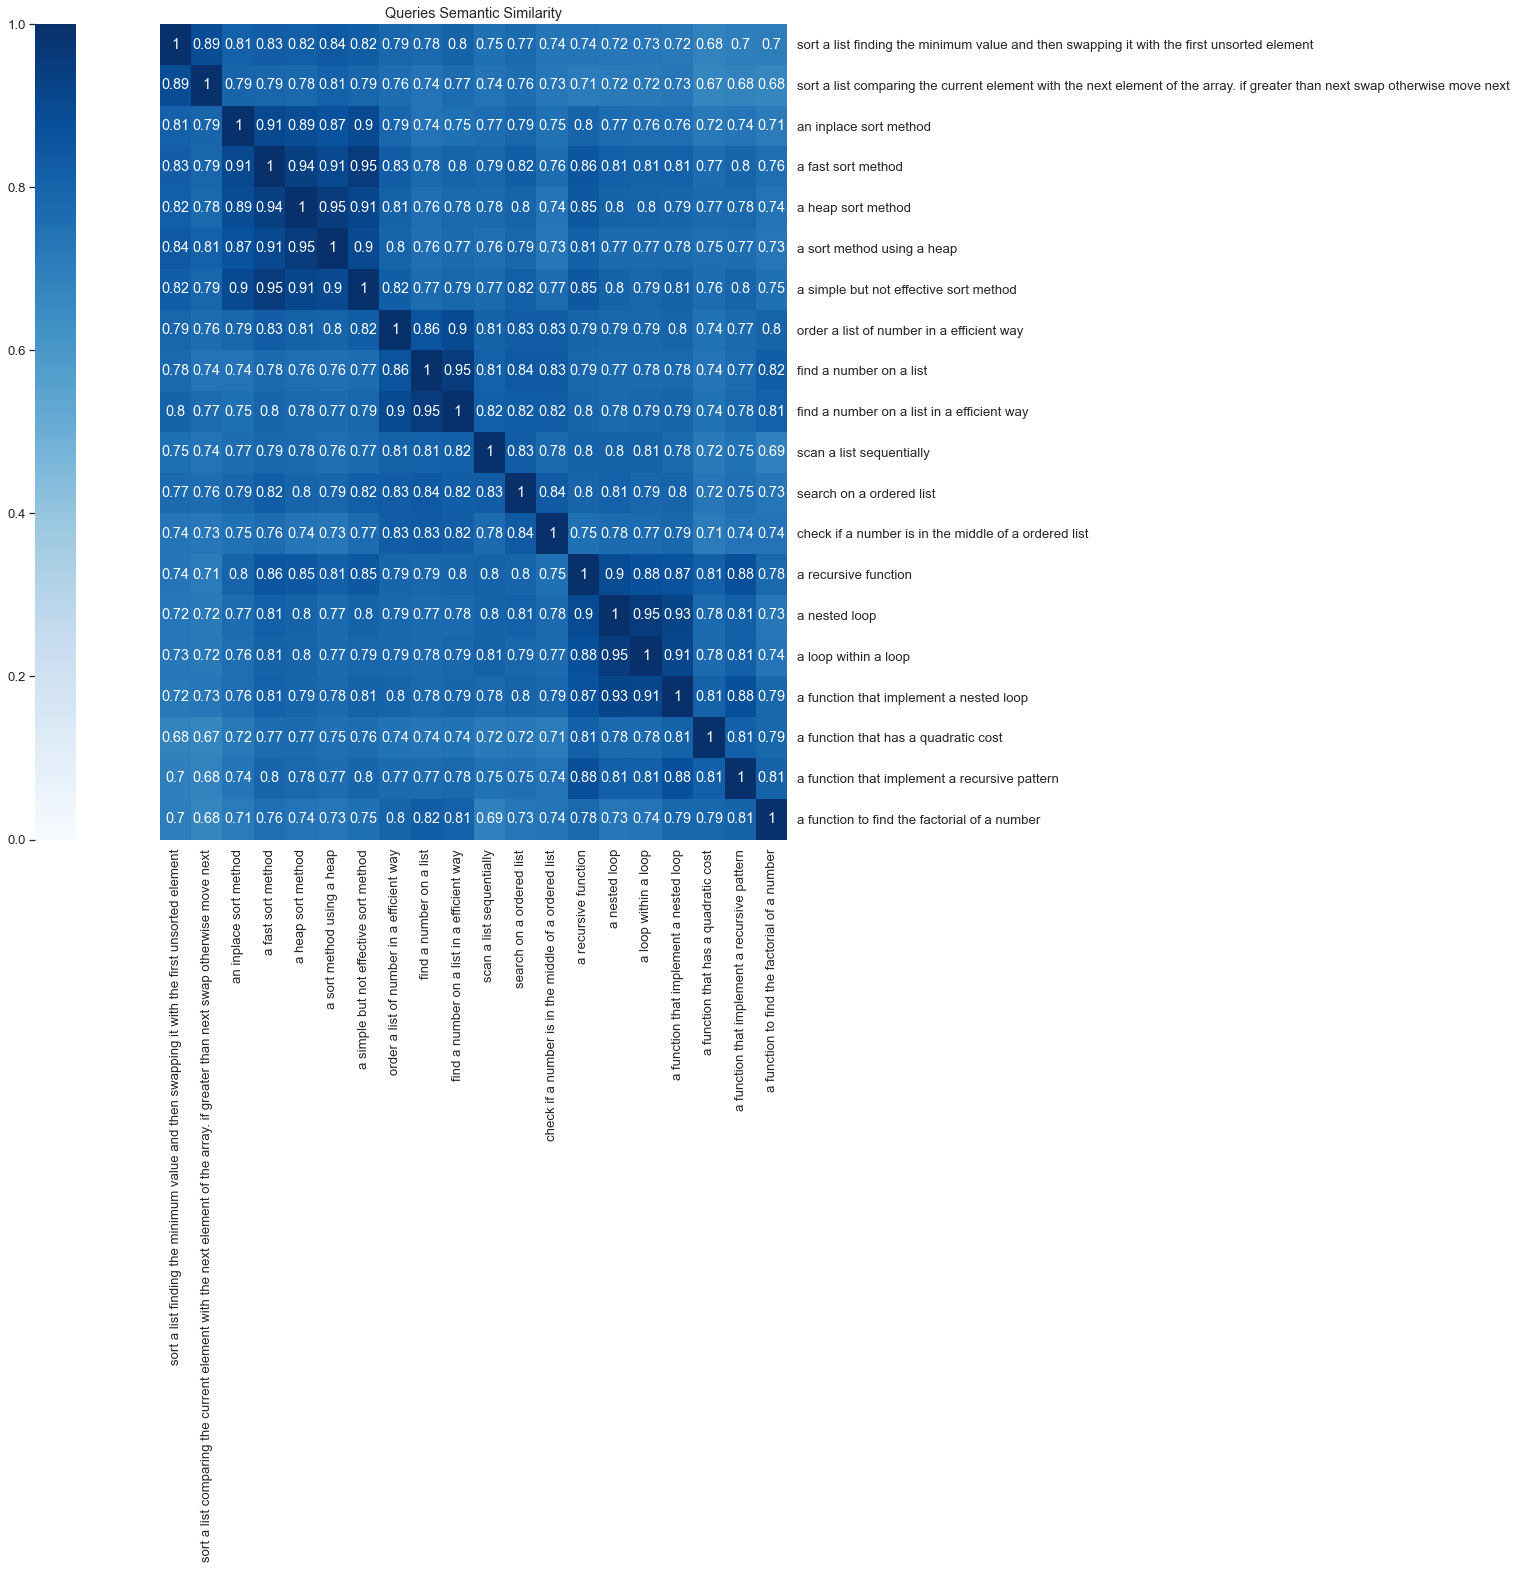

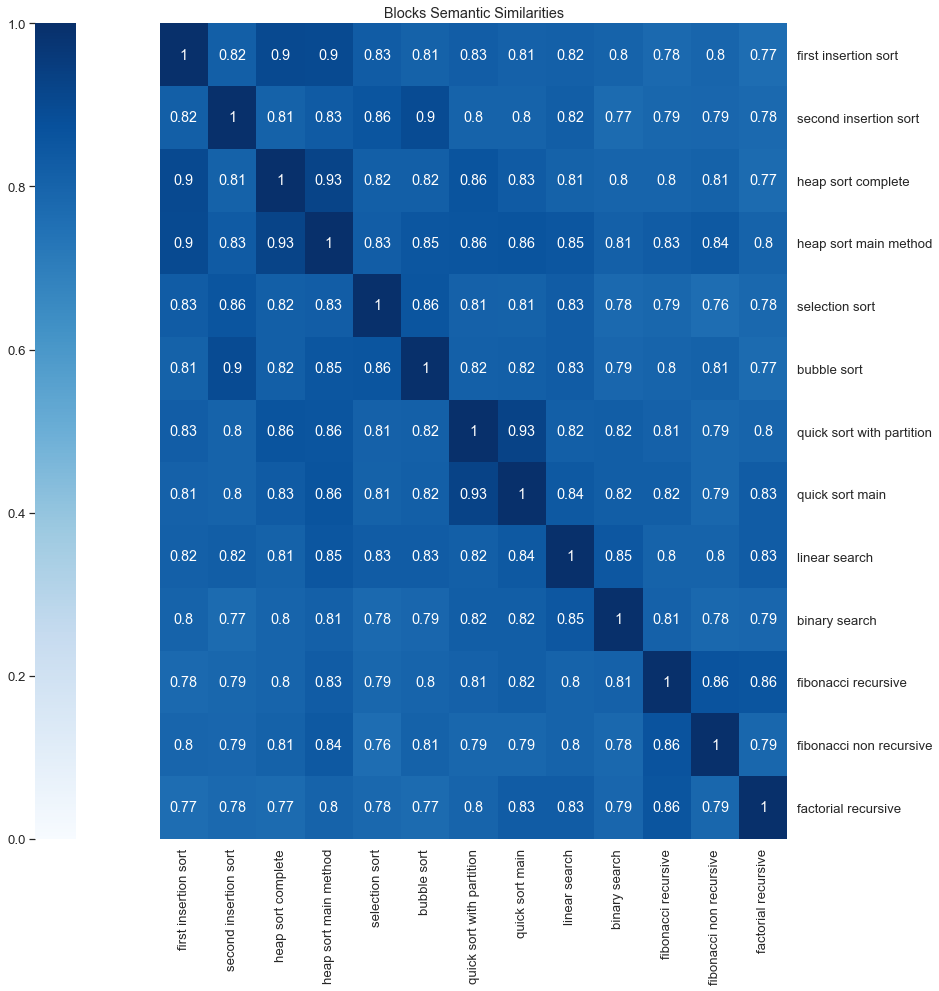

In [18]:
run_full_tests(queries, functions_obfuscated, 'code-search-babbage-text-001-msft', 'code-search-babbage-code-001-msft')

## Comments+Docstrings vs. No Comments Confusion Matrix

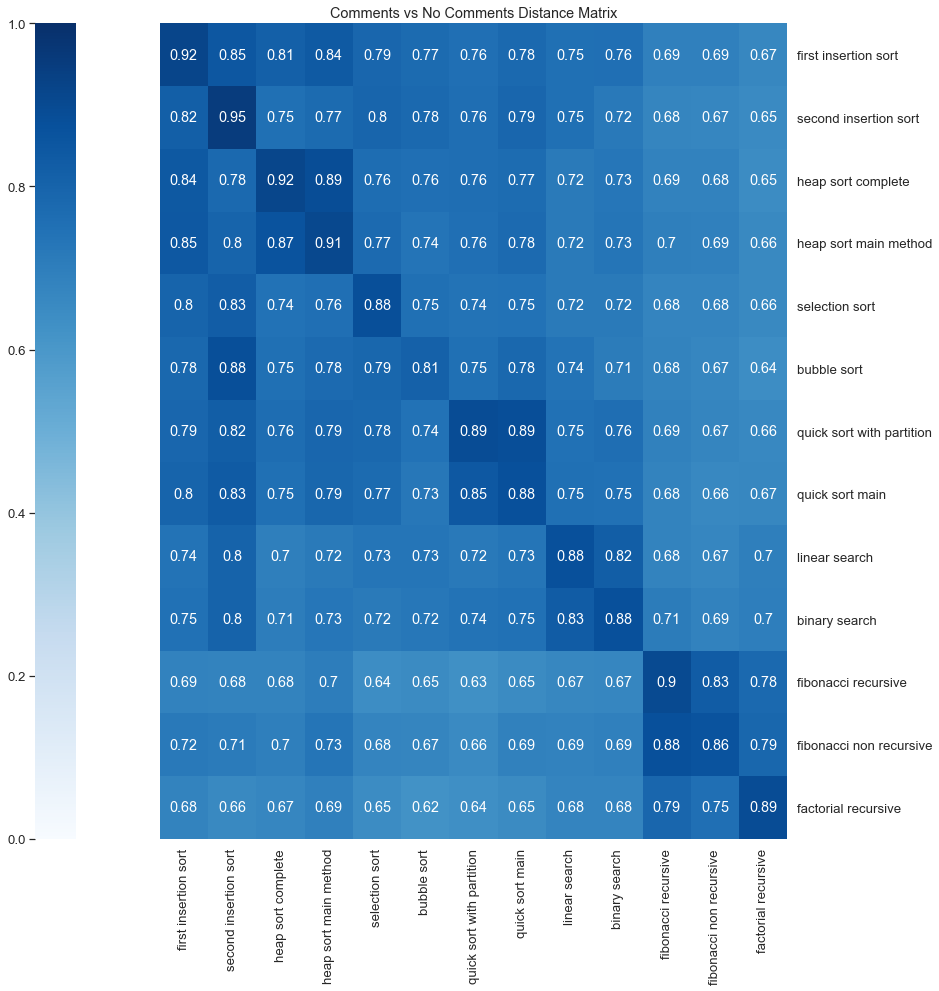

In [19]:
codeblocks_with_comments_embeddings = get_all_embeddings(functions_with_comments.values(), 'code-search-babbage-code-001-msft')
codeblocks_without_comments_embeddings = get_all_embeddings(functions_without_comments.values(), 'code-search-babbage-code-001-msft')
plot_distance_matrix(codeblocks_with_comments_embeddings, codeblocks_without_comments_embeddings, list(functions_with_comments.keys()), list(functions_without_comments.keys()), title='Comments vs No Comments Distance Matrix')

## Comments+Docstrings vs. Obfuscated Confusion Matrix

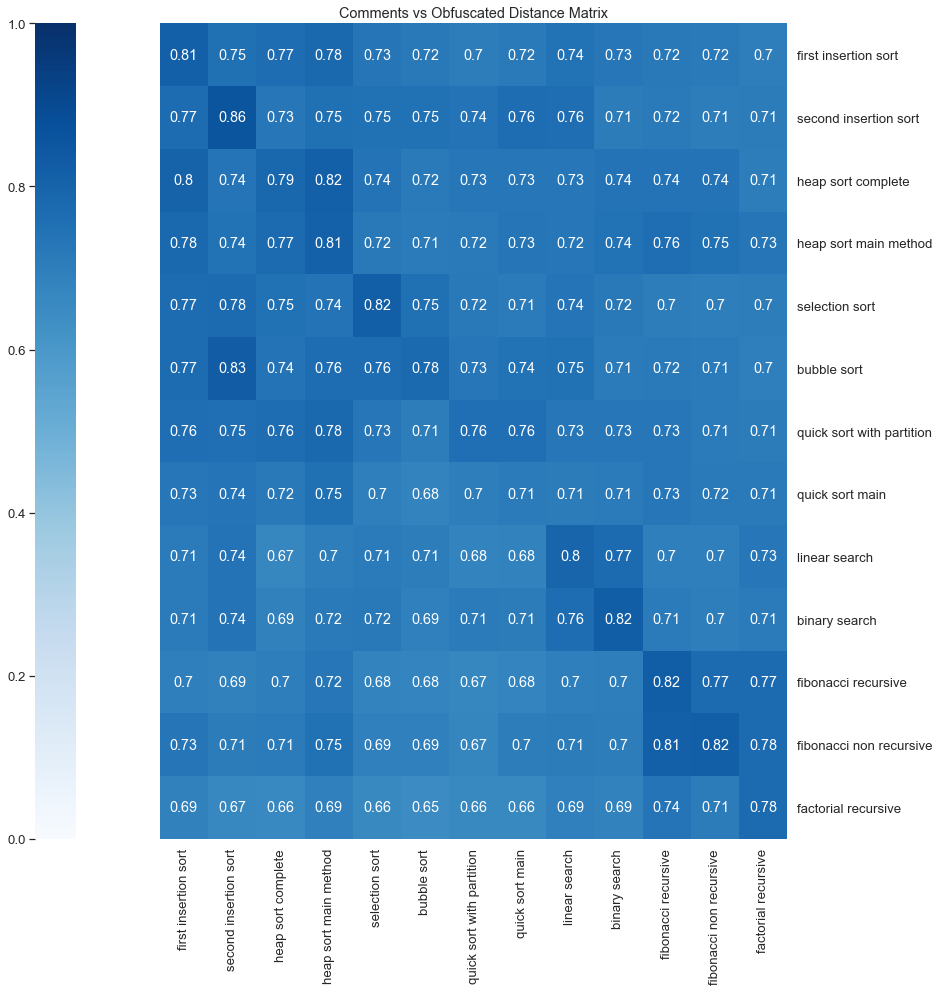

In [20]:
# codeblocks_with_comments_embeddings = get_all_embeddings(functions_with_comments.values(), 'code-search-babbage-code-001-msft')
codeblocks_obfuscated_embeddings = get_all_embeddings(functions_obfuscated.values(), 'code-search-babbage-code-001-msft')
plot_distance_matrix(codeblocks_with_comments_embeddings, codeblocks_obfuscated_embeddings, list(functions_with_comments.keys()), list(functions_obfuscated.keys()), title='Comments vs Obfuscated Distance Matrix')

# Appendix - Full Python Functions used for testing

In [21]:
def insertion_sort(array: list, start: int = 0, end: int = 0) -> list:
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> insertion_sort(array, 0, len(array))
    [1, 2, 4, 6, 7, 8, 8, 12, 14, 14, 22, 23, 27, 45, 56, 79]
    '''
    end = end or len(array)
    for i in range(start, end):
        temp_index = i
        temp_index_value = array[i]
        while temp_index != start and temp_index_value < array[temp_index - 1]:
            array[temp_index] = array[temp_index - 1]
            temp_index -= 1
        array[temp_index] = temp_index_value
    return array


def insertionSort(arr):
    # Move elements of arr[0..i-1], that are greater than key,
    # to one position ahead of their current position
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
            arr[j+1] = arr[j]
            j -= 1          
        arr[j+1] = key


def heapify(array: list, index: int, heap_size: int) -> None:  # Max Heap
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> heapify(array, len(array) // 2 ,len(array))
    '''
    largest = index
    left_index = 2 * index + 1  # Left Node
    right_index = 2 * index + 2  # Right Node

    if left_index < heap_size and array[largest] < array[left_index]:
        largest = left_index

    if right_index < heap_size and array[largest] < array[right_index]:
        largest = right_index

    if largest != index:
        array[index], array[largest] = array[largest], array[index]
        heapify(array, largest, heap_size)

def heap_sort(array: list) -> list:
    '''
    >>> array = [4, 2, 6, 8, 1, 7, 8, 22, 14, 56, 27, 79, 23, 45, 14, 12]
    >>> heap_sort(array)
    [1, 2, 4, 6, 7, 8, 8, 12, 14, 14, 22, 23, 27, 45, 56, 79]
    '''
    n = len(array)

    for i in range(n // 2, -1, -1):
        heapify(array, i, n)

    for i in range(n - 1, 0, -1):
        array[i], array[0] = array[0], array[i]
        heapify(array, 0, i)

    return array


def selection_sort(L):
    '''
    Sorts an array by finding the minimum value of the unsorted part and then swapping it with the first unsorted element.
    '''
    # i indicates how many items were sorted
    for i in range(len(L)-1):
        # To find the minimum value of the unsorted segment
        # We first assume that the first element is the lowest
        min_index = i
        # We then use j to loop through the remaining elements
        for j in range(i+1, len(L)-1):
            # Update the min_index if the element at j is lower than it
            if L[j] < L[min_index]:
                min_index = j
        # After finding the lowest item of the unsorted regions, swap with the first unsorted item
        L[i], L[min_index] = L[min_index], L[i]


def bubbleSort(ar):
    '''
    Starting with the first element(index = 0), compare the current element with the next element of the array.
    If the current element is greater than the next element of the array, swap them.
    If the current element is less than the next element, move to the next element.
    '''
    n = len(arr)
    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in correct position
        for j in range(0, n-i-1):
            # Swap if the element found is greater than the next element
            if ar[j] > ar[j+1] :
                ar[j], ar[j+1] = ar[j+1], ar[j]



def partition(arr, low, high):
    '''
    This function is used by the quick sort method.
    It takes last element as pivot, places
    the pivot element at its correct position in sorted
    array, and places all smaller (smaller than pivot)
    to left of pivot and all greater elements to right
    of pivot.
    '''
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot
 
    for j in range(low, high):
 
        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:
 
            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)

def quickSort(arr, low, high):
    '''
    The main function that implements QuickSort
    arr[] --> Array to be sorted,
    low  --> Starting index,
    high  --> Ending index
    '''
    if len(arr) == 1:
        return arr
    if low < high:
 
        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)
 
        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)


def linearsearch(arr, x):
    '''
    Start from the leftmost element of given arr[] and one by one compare element x with each element of arr[]
    If x matches with any of the element, return the index value.
    If x doesn’t match with any of elements in arr[] , return -1 or element not found.
    '''
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return -1


def binarySearch(arr, start, end, x):
    '''
    Given a sorted list find an element with the help of a binary search.
    
    Compare x with the middle element.
    If x matches with the middle element, we return the mid index.
    Else If x is greater than the mid element, then x can only lie in right half subarray after the mid element. So we recur for the right half.
    Else (x is smaller) recur for the left half.
    '''
    # check condition
    if end >= start:
        mid = start + (end- start)//2
        # If element is present at the middle
        if arr[mid] == x:
            return mid
        # If element is smaller than mid
        elif arr[mid] > x:
            return binarySearchAppr(arr, start, mid-1, x)
        # Else the element greator than mid
        else:
            return binarySearchAppr(arr, mid+1, end, x)
    else:
        # Element is not found in the array
        return -1


def fibonacci(n):
    '''
    The Fibonacci numbers are the numbers in the following integer sequence.
    0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ……..
    
    Recursive approach.
    '''
    if n<0:
        print("Fibbonacci can't be computed")
    # First Fibonacci number
    elif n==1:
        return 0
    # Second Fibonacci number
    elif n==2:
        return 1
    else:
        return fibonacci(n-1)+fibonacci(n-2)


def fibonacci(n):
    '''
    The Fibonacci numbers are the numbers in the following integer sequence.
    0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, ……..
    
    Space Optimized, non recursive approach.
    '''
    a = 0
    b = 1

    # Check is n is less than 0
    if n < 0:
        print("Incorrect input")
    # Check is n is equal to 0
    elif n == 0:
        return 0
    # Check if n is equal to 1
    elif n == 1:
        return b
    else:
        for i in range(1, n):
            c = a + b
            a = b
            b = c
        return b


def factorial(x):
    '''
    This is a recursive function
    to find the factorial of an integer
    '''

    if x == 1:
        return 1
    else:
        return (x * factorial(x-1))
